In [1]:
!pip install pandas-datareader

In [1]:
import pandas_datareader as pdr
import pandas as pd 
from datetime import datetime 

In [10]:
!pip install yfinance


  Using cached yfinance-0.2.28-py2.py3-none-any.whl (65 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Using cached frozendict-2.3.8-cp39-cp39-win_amd64.whl (35 kB)


In [387]:
import yfinance as yf

# Fetch Tesla's stock data
ticker = 'AAPL'
start_date = '2020-01-15'  # Replace with your desired start date
end_date = '2023-09-6'    # Replace with your desired end date

apple_data = yf.download(ticker, start=start_date, end=end_date)



[*********************100%%**********************]  1 of 1 completed


In [388]:
apple_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-15,77.962502,78.875000,77.387497,77.834999,75.929253,121923600
2020-01-16,78.397499,78.925003,78.022499,78.809998,76.880371,108829200
2020-01-17,79.067497,79.684998,78.750000,79.682503,77.731529,137816400
2020-01-21,79.297501,79.754997,79.000000,79.142502,77.204742,110843200
2020-01-22,79.644997,79.997498,79.327499,79.425003,77.480331,101832400
...,...,...,...,...,...,...
2023-08-29,179.699997,184.899994,179.500000,184.119995,184.119995,53003900
2023-08-30,184.940002,187.850006,184.740005,187.649994,187.649994,60813900
2023-08-31,187.839996,189.119995,187.479996,187.869995,187.869995,60794500


<AxesSubplot:xlabel='Date'>

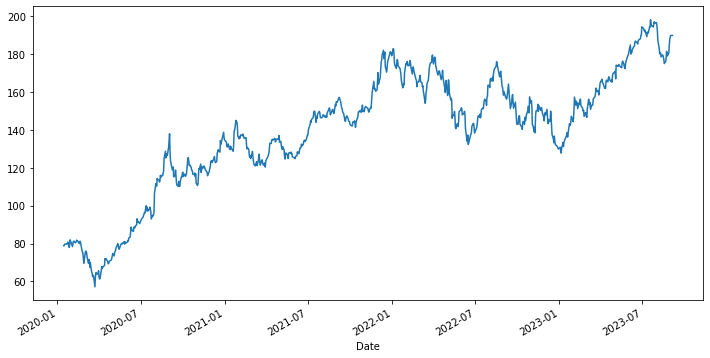

In [389]:
apple_data['High'].plot(figsize=(12,6))

<AxesSubplot:xlabel='Date'>

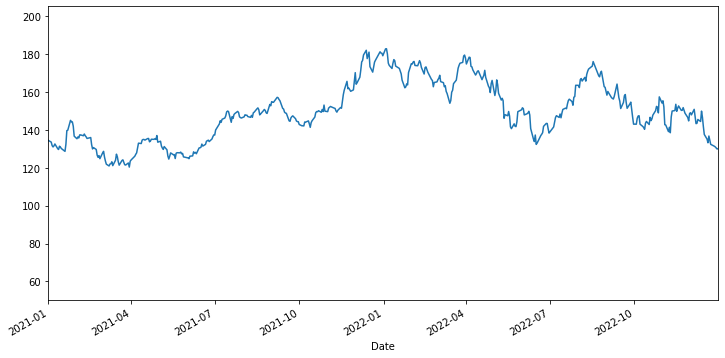

In [390]:
#setting limits to get a exact time frame 
apple_data['High'].plot(xlim=['2021-01-01','2022-12-31'],figsize=(12,6))

In [391]:
index=apple_data.loc['2021-01-01':'2022-12-31'].index

In [392]:
share_open=apple_data.loc['2021-01-01':'2022-12-31']['Open']

In [393]:
import matplotlib.pyplot as plt
%matplotlib inline

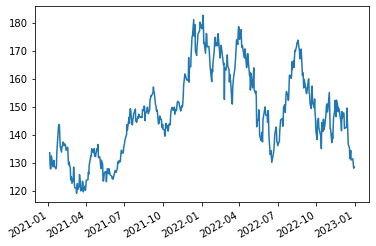

In [394]:
figure,axis=plt.subplots()
plt.tight_layout
figure.autofmt_xdate()#done so that date doesn't overlap 
axis.plot(index,share_open)

In [395]:
apple_data=apple_data.reset_index()

In [396]:
apple_data.info()#conversion of index to columns for datetime 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       916 non-null    datetime64[ns]
 1   Open       916 non-null    float64       
 2   High       916 non-null    float64       
 3   Low        916 non-null    float64       
 4   Close      916 non-null    float64       
 5   Adj Close  916 non-null    float64       
 6   Volume     916 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 50.2 KB


In [397]:
apple_data=apple_data.set_index('Date',drop=True)

In [398]:
apple_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-15,77.962502,78.875000,77.387497,77.834999,75.929253,121923600
2020-01-16,78.397499,78.925003,78.022499,78.809998,76.880371,108829200
2020-01-17,79.067497,79.684998,78.750000,79.682503,77.731529,137816400
2020-01-21,79.297501,79.754997,79.000000,79.142502,77.204742,110843200
2020-01-22,79.644997,79.997498,79.327499,79.425003,77.480331,101832400
...,...,...,...,...,...,...
2023-08-29,179.699997,184.899994,179.500000,184.119995,184.119995,53003900
2023-08-30,184.940002,187.850006,184.740005,187.649994,187.649994,60813900
2023-08-31,187.839996,189.119995,187.479996,187.869995,187.869995,60794500


In [399]:
 #"#resampling would be useful to convert the data into different frequency such as year or month \n","#The other rule is that it can be used to group datasets according to column  we can't use groupby as it does according to column \n",
   # "#M signifies Month min is the total lowest of that entire month \n",

In [400]:
apple_data1=apple_data['Open'].resample(rule='QS').max()

In [401]:
apple_data2=apple_data['Open'].resample(rule='M').max()

<AxesSubplot:xlabel='Date'>

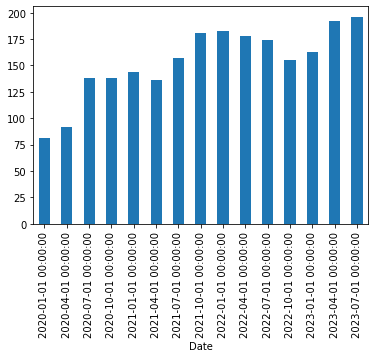

In [402]:
apple_data1.plot(kind='bar')

In [403]:
#The use of rolling is to calculate according to a certain window which would be specified \n",

In [404]:
apple_data['rolling']=apple_data['Open'].rolling(90).mean()

<AxesSubplot:xlabel='Date'>

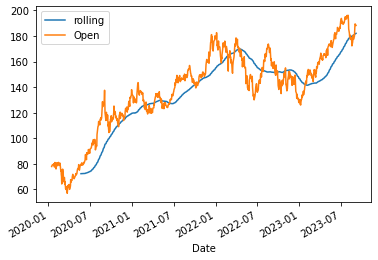

In [405]:
apple_data[['rolling','Open']].plot()

In [406]:
#upward trend-\n", "#downward trend \n", "#cyclic trend \n","#cyclic data"


In [407]:
print(apple_data['High'].max())
apple_data['High'].idxmax()
# The reason for stock going high can be due to the news Apple tests generative AI tools to rival OpenAI's ChatGPT

198.22999572753906


Timestamp('2023-07-19 00:00:00')

In [408]:
print(apple_data['Low'].min())
apple_data['Low'].idxmin()
#COVID 19 Lockdown 

53.15250015258789


Timestamp('2020-03-23 00:00:00')

In [409]:
#In the window size we are trying to calculate the moving averages of a stock "

In [410]:
#simple moving average disadvantage as not weighted provided 

In [411]:
#Cumulative moving average takes average of every value and includes it in number of observations 

<AxesSubplot:xlabel='Date'>

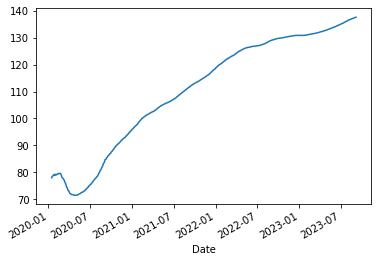

In [412]:
apple_data['Open'].expanding().mean().plot()

In [413]:
#exponential moving average gives a specific weight a to previous time stamp and (1-a) EMWA OF the previous one
apple_data['EMWA']=apple_data['Open'].ewm(alpha=0.1,adjust=False).mean()

In [414]:
apple_data['EMWA3']=apple_data['Open'].ewm(alpha=0.3,adjust=False).mean()# WEIGHT =0.3

<AxesSubplot:xlabel='Date'>

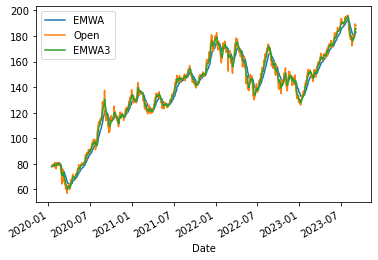

In [415]:
apple_data[['EMWA','Open','EMWA3']].plot()

In [416]:
#y=beta0+beta1 auto regression using past values to find but how to find the previous values for the following we can 
#use the partial auto correlation diagram to find using the peak  to choose number of the lags we will plot pacf and check how many are satisfying the boundary 

In [417]:
# we will convert the data into stationary for applying time series models by differencing and the no of times it is differenced 
#can be called as lags and then we will apply adf test to check p value if it lies less than p<0.05 we will proceed further 

In [418]:
 
import statsmodels.api as sms 

In [419]:
apple_data['Open'].isna().sum()

0

In [420]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 916 entries, 2020-01-15 to 2023-09-05
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       916 non-null    float64
 1   High       916 non-null    float64
 2   Low        916 non-null    float64
 3   Close      916 non-null    float64
 4   Adj Close  916 non-null    float64
 5   Volume     916 non-null    int64  
 6   rolling    827 non-null    float64
 7   EMWA       916 non-null    float64
 8   EMWA3      916 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 71.6 KB


In [421]:
apple_data=apple_data.reset_index()

In [422]:
apple_data.set_index('Date',inplace=True)

In [423]:
apple_data

,Open,High,Low,Close,Adj Close,Volume,rolling,EMWA,EMWA3
Date,,,,,,,,,
2020-01-15,77.962502,78.875000,77.387497,77.834999,75.929253,121923600,NaN,77.962502,77.962502
2020-01-16,78.397499,78.925003,78.022499,78.809998,76.880371,108829200,NaN,78.006001,78.093001
2020-01-17,79.067497,79.684998,78.750000,79.682503,77.731529,137816400,NaN,78.112151,78.385350
2020-01-21,79.297501,79.754997,79.000000,79.142502,77.204742,110843200,NaN,78.230686,78.658995
2020-01-22,79.644997,79.997498,79.327499,79.425003,77.480331,101832400,NaN,78.372117,78.954795
...,...,...,...,...,...,...,...,...,...
2023-08-29,179.699997,184.899994,179.500000,184.119995,184.119995,53003900,181.048557,180.560550,178.905525
2023-08-30,184.940002,187.850006,184.740005,187.649994,187.649994,60813900,181.269557,180.998495,180.715868
2023-08-31,187.839996,189.119995,187.479996,187.869995,187.869995,60794500,181.523334,181.682645,182.853107


In [424]:
from statsmodels.tsa.stattools import adfuller

#perform augmented Dickey-Fuller test
p_value=adfuller(apple_data['Open'])[1]
print(f'The p value is {p_value}')

The p value is 0.5628240478699709


In [425]:
apple_data['open_first_difference']=apple_data['Open']-apple_data['Open'].shift(1)# We took a  difference

In [568]:
apple_data['open_seasonal_difference']=apple_data['Open']-apple_data['Open'].shift(12)# We took a  difference

In [569]:
from statsmodels.tsa.stattools import adfuller

p_value = adfuller(apple_data['open_second_difference'].dropna())[1]
print(f'The p value is {p_value}')# p-value 0 makes it a stationary data 

The p value is 2.2009609838727534e-21


In [505]:
apple_data['open_second_difference']=apple_data['open_first_difference']-apple_data['open_first_difference'].shift(1)# We took a  difference

In [506]:
from statsmodels.tsa.stattools import adfuller

p_value = adfuller(apple_data['open_second_difference'].dropna())[1]
print(f'The p value is {p_value}')# p-value 0 makes it a stationary data 

The p value is 2.2009609838727534e-21


In [507]:
from statsmodels.tsa.stattools import adfuller

p_value = adfuller(apple_data['open_first_difference'].dropna())[1]
print(f'The p value is {p_value}')# p-value 0 makes it a stationary data 

The p value is 0.0


In [508]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 

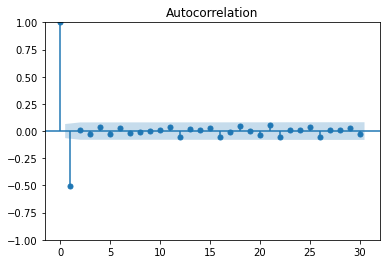

In [509]:
acf=plot_acf(apple_data['open_second_difference'].dropna())# q value should be 1 12 or 16

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


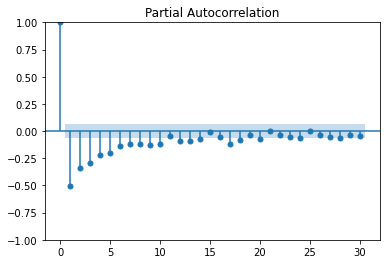

In [510]:
pacf=plot_pacf(apple_data['open_second_difference'].dropna())# p value should be 1 or 2 or 3 |

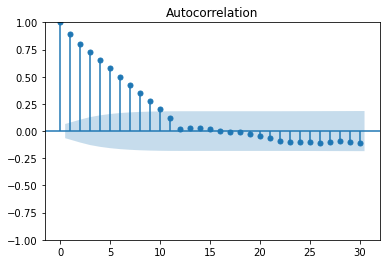

In [570]:
acf=plot_acf(apple_data['open_seasonal_difference'].dropna())# q value should be 1 12 or 16

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


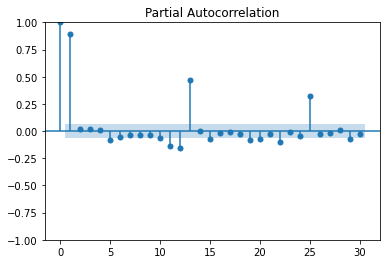

In [571]:
pacf=plot_pacf(apple_data['open_seasonal_difference'].dropna())# p value should be 1 or 2 or 3 |

In [511]:
from datetime import datetime,timedelta
train_data_end=datetime(2022,12,31)
test_data_end=datetime(2023,9,5)

In [512]:
train_data=apple_data[:train_data_end]
test_data=apple_data[train_data_end:test_data_end]

In [513]:
train_data

,Open,High,Low,Close,Adj Close,Volume,rolling,EMWA,EMWA3,open_first_difference,open_second_difference
Date,,,,,,,,,,,
2020-01-15,77.962502,78.875000,77.387497,77.834999,75.929253,121923600,NaN,77.962502,77.962502,NaN,NaN
2020-01-16,78.397499,78.925003,78.022499,78.809998,76.880371,108829200,NaN,78.006001,78.093001,0.434998,NaN
2020-01-17,79.067497,79.684998,78.750000,79.682503,77.731529,137816400,NaN,78.112151,78.385350,0.669998,0.235001
2020-01-21,79.297501,79.754997,79.000000,79.142502,77.204742,110843200,NaN,78.230686,78.658995,0.230003,-0.439995
2020-01-22,79.644997,79.997498,79.327499,79.425003,77.480331,101832400,NaN,78.372117,78.954795,0.347496,0.117493
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900,148.691112,139.607597,134.128631,-3.430008,-4.800018
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477585,69007800,148.220334,138.784838,133.304043,0.460007,3.890015
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504539,85438400,147.738556,137.873354,132.213830,-1.710007,-2.170013


In [514]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [515]:
test_data.head(234)

,Open,High,Low,Close,Adj Close,Volume,rolling,EMWA,EMWA3,open_first_difference,open_second_difference
Date,,,,,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.538658,112117500,146.434001,135.461765,130.213974,1.869995,1.449989
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.823189,89113600,145.968556,134.604589,129.216781,-3.389999,-5.259995
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.488876,80962700,145.485890,133.857129,128.590746,0.239998,3.629997
2023-01-06,126.010002,130.289993,124.889999,129.619995,129.069321,87754700,145.095445,133.072417,127.816523,-1.119995,-1.359993
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.597061,70790800,144.743667,132.812175,128.612566,4.459999,5.579994
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-29,179.699997,184.899994,179.500000,184.119995,184.119995,53003900,181.048557,180.560550,178.905525,-0.389999,-3.099991
2023-08-30,184.940002,187.850006,184.740005,187.649994,187.649994,60813900,181.269557,180.998495,180.715868,5.240005,5.630005
2023-08-31,187.839996,189.119995,187.479996,187.869995,187.869995,60794500,181.523334,181.682645,182.853107,2.899994,-2.340012


In [567]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [517]:
train_data

,Open,High,Low,Close,Adj Close,Volume,rolling,EMWA,EMWA3,open_first_difference,open_second_difference
Date,,,,,,,,,,,
2020-01-15,77.962502,78.875000,77.387497,77.834999,75.929253,121923600,NaN,77.962502,77.962502,NaN,NaN
2020-01-16,78.397499,78.925003,78.022499,78.809998,76.880371,108829200,NaN,78.006001,78.093001,0.434998,NaN
2020-01-17,79.067497,79.684998,78.750000,79.682503,77.731529,137816400,NaN,78.112151,78.385350,0.669998,0.235001
2020-01-21,79.297501,79.754997,79.000000,79.142502,77.204742,110843200,NaN,78.230686,78.658995,0.230003,-0.439995
2020-01-22,79.644997,79.997498,79.327499,79.425003,77.480331,101832400,NaN,78.372117,78.954795,0.347496,0.117493
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900,148.691112,139.607597,134.128631,-3.430008,-4.800018
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477585,69007800,148.220334,138.784838,133.304043,0.460007,3.890015
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504539,85438400,147.738556,137.873354,132.213830,-1.710007,-2.170013


In [558]:
model_ARIMA=ARIMA(apple_data['Open'],order=(1,2,1))

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [559]:
model_arima_fit=model_ARIMA.fit()

In [560]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                  916
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -2228.104
Date:                Wed, 06 Sep 2023   AIC                           4462.207
Time:                        19:41:15   BIC                           4476.661
Sample:                             0   HQIC                          4467.724
                                - 916                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0539      0.026     -2.072      0.038      -0.105      -0.003
ma.L1         -0.9998      0.053    -19.005      0.000      -1.103      -0.897
sigma2         7.6156      0.468     16.288      0.000       6.699       8.532
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               113.33
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                            -0.32
Prob(H) (two-sided):                  0.68   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [594]:
pred=model_arima_fit.predict(start=pred_start_date,end=pred_end_date)

In [595]:
residuals=test_data['Open']-pred

In [596]:
residuals

Date
2023-01-03    1.821934
2023-01-04   -3.362323
2023-01-05   -0.011457
2023-01-06   -1.175678
2023-01-09    4.332555
                ...   
2023-08-29   -0.361841
2023-08-30    5.101390
2023-08-31    3.059337
2023-09-01    1.679775
2023-09-05   -1.249507
Length: 169, dtype: float64

<AxesSubplot:ylabel='Density'>

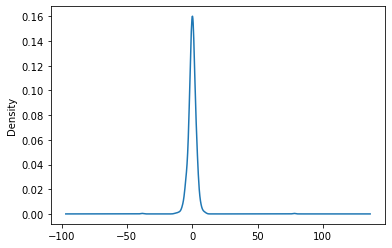

In [597]:
model_arima_fit.resid.plot(kind='kde')

In [598]:
test_data['Predicted_ARIMA']=pred

C:\Users\HP\AppData\Local\Temp\ipykernel_4112\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='Date'>

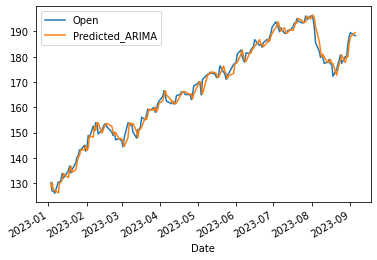

In [599]:
test_data[['Open','Predicted_ARIMA']].plot()

In [586]:
model_SARIMA = SARIMAX(apple_data['Open'], order=(1,0,1), seasonal_order=(0,1,0,12))
# we took d to be 0 in the first as the open seasonal differencing will be covered in seasonal order 

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [600]:
results_SARIMA = model_SARIMA.fit()

In [601]:
pred1=results_SARIMA.predict(start=pred_start_date,end=pred_end_date)

In [602]:
residuals=test_data['Open']-pred1

<AxesSubplot:ylabel='Density'>

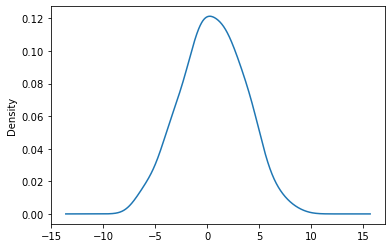

In [603]:
residuals.plot(kind='kde')

In [608]:
test_data['Predicted_SARIMA']=pred1

C:\Users\HP\AppData\Local\Temp\ipykernel_4112\875161322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred1


<AxesSubplot:xlabel='Date'>

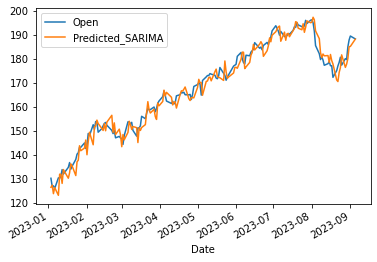

In [609]:
test_data[['Open','Predicted_SARIMA']].plot()

<AxesSubplot:xlabel='Date'>

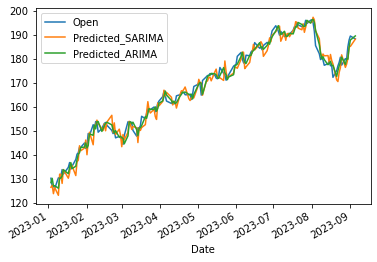

In [610]:
test_data[['Open','Predicted_SARIMA','Predicted_ARIMA']].plot()

In [ ]:
#WHY Arima is better than SARIMA in this one?
#Because this one is not a seasonal order and changes every year 